<a href="https://colab.research.google.com/github/brandonbaraban/mnasty/blob/master/mnasty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [0]:
mnist = tf.keras.datasets.mnist # each matrix of data is shape (samples, variables)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
x_train = np.reshape(x_train, (x_train.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))
n = x_train.shape[-1]

In [0]:
normalize = True

In [0]:
if normalize:
  x_train, x_test = x_train / 255.0, x_test / 255.0
# center data
x_train -= np.mean(x_train, axis=0)
x_test -= np.mean(x_test, axis=0)

In [6]:
print('calculating svd...')
u, s, vh = np.linalg.svd(x_train, full_matrices=False)
print('done.')

calculating svd...
done.


In [0]:
input_shape = x_train[0].shape
hidden_units = 512
dropout_rate = 0.2

In [0]:
# simple one hidden layer with dropout
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(hidden_units, input_shape=input_shape, activation=tf.nn.relu),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
initial_weights = model.get_weights()

In [0]:
ks = [1, 5, 10, 50, 100, 400, n]
histories, test_loss, test_acc = list(), list(), list()
for k in ks:
  uk = u[:, :k]
  sk = s[:k]
  vhk = vh[:k, :]
  x_pca = uk @ np.diag(sk) @ vhk
  model.set_weights(initial_weights)
  histories.append(model.fit(x_pca, y_train, epochs=5, verbose=0))
  loss, acc = model.evaluate(x_test, y_test, verbose=0)
  test_loss.append(loss)
  test_acc.append(acc)

In [0]:
rand_histories, rand_test_loss, rand_test_acc = list(), list(), list()
for k in ks:
  x_rand = x_train.copy()
  x_rand[:, np.random.choice(n, n - k, replace=False)] = 0
  model.set_weights(initial_weights)
  rand_histories.append(model.fit(x_rand, y_train, epochs=5, verbose=0))
  loss, acc = model.evaluate(x_test, y_test, verbose=0)
  rand_test_loss.append(loss)
  rand_test_acc.append(acc)

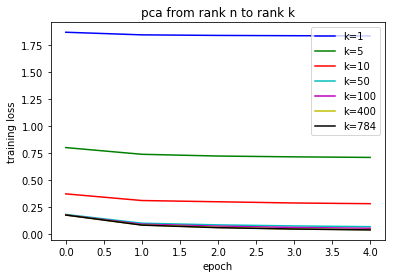

In [11]:
colors = 'bgrcmyk'
fig, ax = plt.subplots(1)
for i in range(len(ks)):
  ax.plot(histories[i].history['loss'], color=colors[i], label='k=' + str(ks[i]))
plt.title('pca from rank n to rank k')
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.legend()
plt.show()

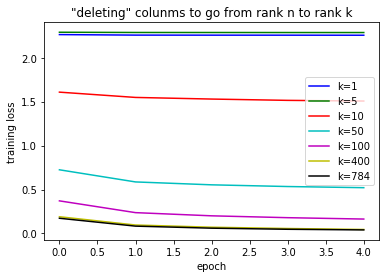

In [12]:
fig, ax = plt.subplots(1)
for i in range(len(ks)):
  ax.plot(rand_histories[i].history['loss'], color=colors[i], label='k=' + str(ks[i]))
plt.title('"deleting" colunms to go from rank n to rank k')
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.legend()
plt.show()

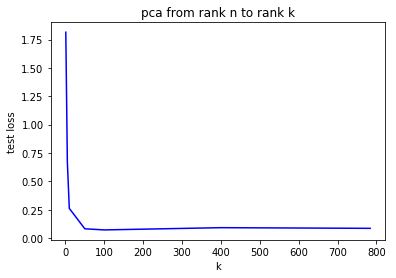

In [13]:
fig, ax = plt.subplots(1)
ax.plot(ks, test_loss, color=colors[0])
plt.title('pca from rank n to rank k')
plt.xlabel('k')
plt.ylabel('test loss')
plt.show()

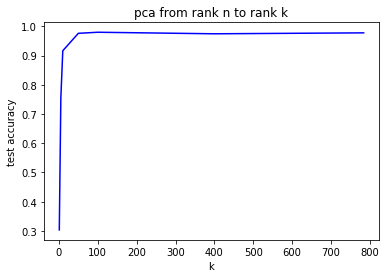

In [14]:
fig, ax = plt.subplots(1)
ax.plot(ks, test_acc, color=colors[0])
plt.title('pca from rank n to rank k')
plt.xlabel('k')
plt.ylabel('test accuracy')
plt.show()

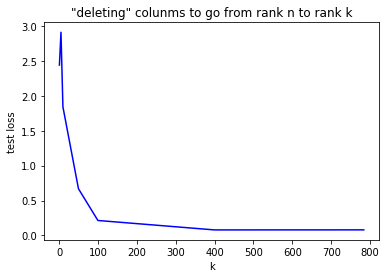

In [15]:
fig, ax = plt.subplots(1)
ax.plot(ks, rand_test_loss, color=colors[0])
plt.title('"deleting" colunms to go from rank n to rank k')
plt.xlabel('k')
plt.ylabel('test loss')
plt.show()

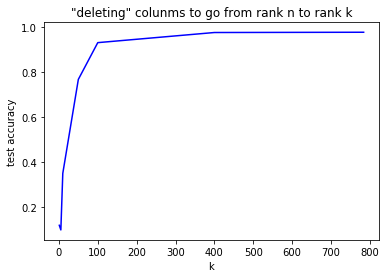

In [16]:
fig, ax = plt.subplots(1)
ax.plot(ks, rand_test_acc, color=colors[0])
plt.title('"deleting" colunms to go from rank n to rank k')
plt.xlabel('k')
plt.ylabel('test accuracy')
plt.show()